In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

In [17]:
ticker='PG'
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)

try:
    data = yf.download(ticker, start=start, end=end)
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

[*********************100%%**********************]  1 of 1 completed


In [18]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.529936,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.469572,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.363943,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.379031,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.348855,1795200


In [11]:
PG.tail()

,Adj Close
Date,
2017-03-16,75.101357
2017-03-17,74.739967
2017-03-20,74.920654
2017-03-21,74.896004
2017-03-22,74.731758


Simple rate of return

$$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$$

In [12]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1) - 1)

In [13]:
PG['log_return'] = np.log10((PG['Adj Close'] / PG['Adj Close'].shift(1)))

In [14]:
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.003496
1995-01-05   -0.006185
1995-01-06    0.000889
1995-01-09   -0.001780
                ...   
2017-03-16    0.000190
2017-03-17   -0.002095
2017-03-20    0.001049
2017-03-21   -0.000143
2017-03-22   -0.000953
Name: log_return, Length: 5595, dtype: float64


In [6]:
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008017
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-16    0.000438
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
Name: simple_return, Length: 5595, dtype: float64


<Axes: xlabel='Date'>

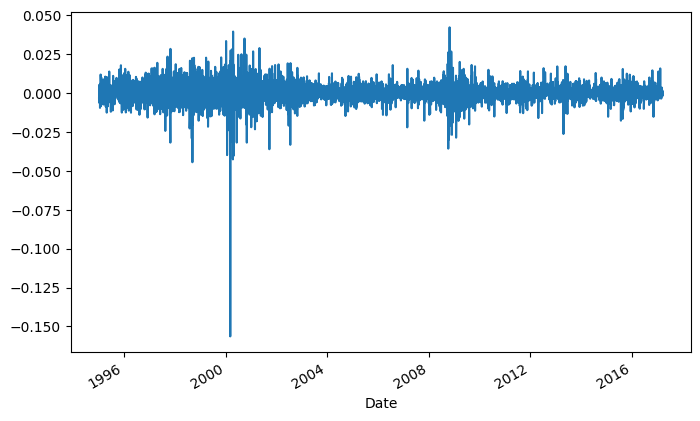

In [15]:
PG['log_return'].plot(figsize=(8,5))

In [8]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario

0.0005143588933523907

In [9]:
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252
# Así, el retorno anual es

In [10]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.12858972333809768

In [11]:
print(str(round(avg_returns_a, 5) * 100) + '%')

12.859000000000002%
